## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 4s 19ms/step - loss: 2.2747 - accuracy: 0.1643 - val_loss: 2.2229 - val_accuracy: 0.2212
Epoch 2/500
196/196 [==============================] - 3s 16ms/step - loss: 2.1934 - accuracy: 0.2376 - val_loss: 2.1628 - val_accuracy: 0.2573
Epoch 3/500
196/196 [==============================] - 3s 16ms/step - loss: 2.1375 - accuracy: 0.2576 - val_loss: 2.1119 - val_accuracy: 0.2684
Epoch 4/500
196/196 [==============================] - 3s 16ms/step - loss: 2.0913 - accuracy: 0.2723 - val_loss: 2.0699 - val_accuracy: 0.2800
Epoch 5/500
196/196 [==============================] - 3s 16ms/step - loss: 2.0527 - accuracy: 0.2822 - val_loss: 2.0345 - val_accuracy: 0.2915
Epoch 6/500
196/196 [==============================] - 3s 16ms/step - loss: 2.0195 - accuracy: 0.2941 - val_loss: 2.0039 - val_accuracy: 0.3034
Epoch 7/500
196/196 [==============================] - 3s 17ms/step - loss: 1.9909 - accuracy: 0.3042 - val_loss: 1.9783 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 1.6514 - accuracy: 0.4235 - val_loss: 1.6570 - val_accuracy: 0.4225
Epoch 58/500
196/196 [==============================] - 3s 17ms/step - loss: 1.6487 - accuracy: 0.4252 - val_loss: 1.6559 - val_accuracy: 0.4215
Epoch 59/500
196/196 [==============================] - 4s 20ms/step - loss: 1.6458 - accuracy: 0.4258 - val_loss: 1.6526 - val_accuracy: 0.4241
Epoch 60/500
196/196 [==============================] - 4s 18ms/step - loss: 1.6432 - accuracy: 0.4259 - val_loss: 1.6486 - val_accuracy: 0.4253
Epoch 61/500
196/196 [==============================] - 3s 16ms/step - loss: 1.6401 - accuracy: 0.4267 - val_loss: 1.6464 - val_accuracy: 0.4265
Epoch 62/500
196/196 [==============================] - 3s 16ms/step - loss: 1.6376 - accuracy: 0.4279 - val_loss: 1.6464 - val_accuracy: 0.4259
Epoch 63/500
196/196 [==============================] - 3s 15ms/step - loss: 1.6350 - accuracy: 0.4291 - val_loss: 1.6411 - val_accuracy: 0.429

196/196 [==============================] - 3s 15ms/step - loss: 1.5261 - accuracy: 0.4686 - val_loss: 1.5491 - val_accuracy: 0.4592
Epoch 114/500
196/196 [==============================] - 3s 15ms/step - loss: 1.5242 - accuracy: 0.4695 - val_loss: 1.5448 - val_accuracy: 0.4584
Epoch 115/500
196/196 [==============================] - 3s 15ms/step - loss: 1.5226 - accuracy: 0.4706 - val_loss: 1.5423 - val_accuracy: 0.4602
Epoch 116/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5208 - accuracy: 0.4703 - val_loss: 1.5445 - val_accuracy: 0.4614
Epoch 117/500
196/196 [==============================] - 3s 15ms/step - loss: 1.5191 - accuracy: 0.4702 - val_loss: 1.5430 - val_accuracy: 0.4563
Epoch 118/500
196/196 [==============================] - 3s 15ms/step - loss: 1.5172 - accuracy: 0.4719 - val_loss: 1.5397 - val_accuracy: 0.4602
Epoch 119/500
196/196 [==============================] - 3s 15ms/step - loss: 1.5153 - accuracy: 0.4730 - val_loss: 1.5431 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 1.4364 - accuracy: 0.5005 - val_loss: 1.4785 - val_accuracy: 0.4830
Epoch 170/500
196/196 [==============================] - 3s 16ms/step - loss: 1.4349 - accuracy: 0.5014 - val_loss: 1.4839 - val_accuracy: 0.4759
Epoch 171/500
196/196 [==============================] - 3s 16ms/step - loss: 1.4336 - accuracy: 0.4994 - val_loss: 1.4757 - val_accuracy: 0.4842
Epoch 172/500
196/196 [==============================] - 3s 16ms/step - loss: 1.4323 - accuracy: 0.4999 - val_loss: 1.4792 - val_accuracy: 0.4829
Epoch 173/500
196/196 [==============================] - 3s 15ms/step - loss: 1.4303 - accuracy: 0.5017 - val_loss: 1.4771 - val_accuracy: 0.4830
Epoch 174/500
196/196 [==============================] - 3s 16ms/step - loss: 1.4286 - accuracy: 0.5030 - val_loss: 1.4736 - val_accuracy: 0.4850
Epoch 175/500
196/196 [==============================] - 3s 16ms/step - loss: 1.4274 - accuracy: 0.5031 - val_loss: 1.4729 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 1.3581 - accuracy: 0.5267 - val_loss: 1.4288 - val_accuracy: 0.4968
Epoch 226/500
196/196 [==============================] - 3s 17ms/step - loss: 1.3573 - accuracy: 0.5284 - val_loss: 1.4324 - val_accuracy: 0.4959
Epoch 227/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3562 - accuracy: 0.5274 - val_loss: 1.4376 - val_accuracy: 0.4936
Epoch 228/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3552 - accuracy: 0.5270 - val_loss: 1.4292 - val_accuracy: 0.4937
Epoch 229/500
196/196 [==============================] - 3s 17ms/step - loss: 1.3534 - accuracy: 0.5290 - val_loss: 1.4319 - val_accuracy: 0.4934
Epoch 230/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3518 - accuracy: 0.5292 - val_loss: 1.4262 - val_accuracy: 0.4980
Epoch 231/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3505 - accuracy: 0.5305 - val_loss: 1.4349 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.2890 - accuracy: 0.5522 - val_loss: 1.3935 - val_accuracy: 0.5059
Epoch 282/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2877 - accuracy: 0.5530 - val_loss: 1.3911 - val_accuracy: 0.5056
Epoch 283/500
196/196 [==============================] - 3s 15ms/step - loss: 1.2865 - accuracy: 0.5521 - val_loss: 1.3929 - val_accuracy: 0.5055
Epoch 284/500
196/196 [==============================] - 3s 15ms/step - loss: 1.2853 - accuracy: 0.5531 - val_loss: 1.4075 - val_accuracy: 0.5016
Epoch 285/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2840 - accuracy: 0.5530 - val_loss: 1.3934 - val_accuracy: 0.5031
Epoch 286/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2824 - accuracy: 0.5542 - val_loss: 1.4045 - val_accuracy: 0.5021
Epoch 287/500
196/196 [==============================] - 3s 15ms/step - loss: 1.2821 - accuracy: 0.5544 - val_loss: 1.3881 - val_accuracy:

196/196 [==============================] - 3s 15ms/step - loss: 1.2256 - accuracy: 0.5732 - val_loss: 1.3753 - val_accuracy: 0.5098
Epoch 338/500
196/196 [==============================] - 3s 15ms/step - loss: 1.2241 - accuracy: 0.5735 - val_loss: 1.3746 - val_accuracy: 0.5135
Epoch 339/500
196/196 [==============================] - 3s 15ms/step - loss: 1.2231 - accuracy: 0.5742 - val_loss: 1.3651 - val_accuracy: 0.5148
Epoch 340/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2221 - accuracy: 0.5738 - val_loss: 1.3715 - val_accuracy: 0.5108
Epoch 341/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2215 - accuracy: 0.5755 - val_loss: 1.3724 - val_accuracy: 0.5152
Epoch 342/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2197 - accuracy: 0.5745 - val_loss: 1.3633 - val_accuracy: 0.5141
Epoch 343/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2188 - accuracy: 0.5760 - val_loss: 1.3688 - val_accuracy:

196/196 [==============================] - 3s 15ms/step - loss: 1.1664 - accuracy: 0.5957 - val_loss: 1.4147 - val_accuracy: 0.5015
Epoch 394/500
196/196 [==============================] - 3s 16ms/step - loss: 1.1650 - accuracy: 0.5945 - val_loss: 1.3491 - val_accuracy: 0.5201
Epoch 395/500
196/196 [==============================] - 3s 17ms/step - loss: 1.1645 - accuracy: 0.5939 - val_loss: 1.3561 - val_accuracy: 0.5142
Epoch 396/500
196/196 [==============================] - 3s 15ms/step - loss: 1.1626 - accuracy: 0.5954 - val_loss: 1.3499 - val_accuracy: 0.5223
Epoch 397/500
196/196 [==============================] - 3s 15ms/step - loss: 1.1622 - accuracy: 0.5955 - val_loss: 1.3545 - val_accuracy: 0.5160
Epoch 398/500
196/196 [==============================] - 3s 15ms/step - loss: 1.1605 - accuracy: 0.5969 - val_loss: 1.3583 - val_accuracy: 0.5204
Epoch 399/500
196/196 [==============================] - 3s 15ms/step - loss: 1.1590 - accuracy: 0.5962 - val_loss: 1.3458 - val_accuracy:

196/196 [==============================] - 3s 15ms/step - loss: 1.1074 - accuracy: 0.6161 - val_loss: 1.3459 - val_accuracy: 0.5241
Epoch 450/500
196/196 [==============================] - 3s 15ms/step - loss: 1.1066 - accuracy: 0.6162 - val_loss: 1.3357 - val_accuracy: 0.5272
Epoch 451/500
196/196 [==============================] - 3s 15ms/step - loss: 1.1069 - accuracy: 0.6153 - val_loss: 1.3442 - val_accuracy: 0.5230
Epoch 452/500
196/196 [==============================] - 3s 15ms/step - loss: 1.1061 - accuracy: 0.6148 - val_loss: 1.3504 - val_accuracy: 0.5197
Epoch 453/500
196/196 [==============================] - 3s 16ms/step - loss: 1.1048 - accuracy: 0.6167 - val_loss: 1.3396 - val_accuracy: 0.5250
Epoch 454/500
196/196 [==============================] - 3s 15ms/step - loss: 1.1030 - accuracy: 0.6169 - val_loss: 1.3658 - val_accuracy: 0.5193
Epoch 455/500
196/196 [==============================] - 3s 15ms/step - loss: 1.1028 - accuracy: 0.6169 - val_loss: 1.3378 - val_accuracy:

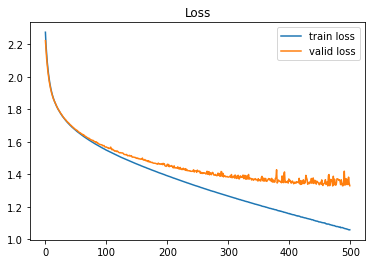

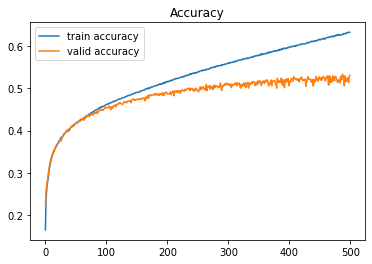

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()